In [101]:
import numpy as np
import pandas as pd
from datetime import datetime

## 데이터 로드

In [102]:
df_seoul_info = pd.read_csv("./data/seoul_info.csv", low_memory=False)
df_seoul_info

,NO,시군구,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세금(만원),건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형,key 값,실거래(만원),보증금/실거래가
0,6,서울특별시 강남구 역삼동,전세,37.49,202512,31,"25,000",0,2004.0,역삼로4길 16,202601~202801,갱신,-,"24,000",0,오피스텔,서울특별시 강남구 역삼동역삼로4길 16,20000,1.250000
1,7,서울특별시 중구 중림동,전세,68.04,202512,31,"59,000",0,2006.0,청파로 464,202602~202702,신규,-,NaN,NaN,오피스텔,서울특별시 중구 중림동청파로 464,74900,0.787717
2,29,서울특별시 동대문구 용두동,전세,23.10,202512,31,"23,000",0,2019.0,청계천로 505,202601~202602,갱신,-,"23,000",0,오피스텔,서울특별시 동대문구 용두동청계천로 505,17000,1.352941
3,30,서울특별시 동대문구 용두동,전세,40.42,202512,31,"44,000",0,2025.0,고산자로 420,202601~202801,신규,-,NaN,NaN,오피스텔,서울특별시 동대문구 용두동고산자로 420,53420,0.823662
4,35,서울특별시 동대문구 신설동,전세,27.78,202512,31,"31,000",0,2023.0,왕산로 18,202601~202801,갱신,사용,"30,000",0,오피스텔,서울특별시 동대문구 신설동왕산로 18,26000,1.192308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175178,132219,서울특별시 성북구 정릉동,전세,83.28,202501,1,"11,000",0,1995.0,서경로 23,202501~203001,신규,-,NaN,NaN,연립다세대,서울특별시 성북구 정릉동서경로 23,18500,0.594595
175179,132221,서울특별시 송파구 문정동,전세,42.63,202501,1,"7,000",0,1990.0,새말로15길 17-8,202510~202710,갱신,-,"7,000",0,연립다세대,서울특별시 송파구 문정동새말로15길 17-8,28000,0.250000
175180,132231,서울특별시 광진구 자양동,전세,47.94,202501,1,"26,000",0,2014.0,자양로3가길 7-12,202508~202708,갱신,-,"26,000",0,연립다세대,서울특별시 광진구 자양동자양로3가길 7-12,53000,0.490566
175181,132241,서울특별시 서초구 방배동,전세,26.62,202501,1,"38,000",0,2020.0,방배천로30길 10,202502~202602,갱신,사용,"38,000",0,연립다세대,서울특별시 서초구 방배동방배천로30길 10,45000,0.844444


## 컬럼별 결측치 확인

In [103]:
# 컬럼별 결측치 비율 확인
print(df_seoul_info.isna().mean().sort_values(ascending=False))
print(df_seoul_info['종전계약 보증금(만원)'])

종전계약 보증금(만원)    0.586472
종전계약 월세(만원)     0.586472
건축년도            0.003082
전월세구분           0.000000
시군구             0.000000
NO              0.000000
전용면적(㎡)         0.000000
보증금(만원)         0.000000
월세금(만원)         0.000000
계약일             0.000000
계약년월            0.000000
계약기간            0.000000
도로명             0.000000
갱신요구권 사용        0.000000
계약구분            0.000000
주택유형            0.000000
key 값           0.000000
실거래(만원)         0.000000
보증금/실거래가        0.000000
dtype: float64
0         24,000
1            NaN
2         23,000
3            NaN
4         30,000
           ...  
175178       NaN
175179     7,000
175180    26,000
175181    38,000
175182       NaN
Name: 종전계약 보증금(만원), Length: 175183, dtype: object


## 필요한 데이터 가공하기

In [104]:
# 필요한 데이터 => 보증금, 실거래가, 보증금/실거래가, 건축연수, 주택 유형별 가중치

# 컬럼별 결측치 비율 확인
""" print(df_seoul_info.isna().mean().sort_values(ascending=False))
print(df_seoul_info['종전계약 보증금(만원)'])
 """

print("============================================================================================")

# 원래 : str => 지금 : float
print('보증금(만원)')
df_seoul_info['보증금(만원)'] = df_seoul_info['보증금(만원)'].astype(str).str.replace(",", "").astype(float)
print(df_seoul_info['보증금(만원)'].info())

print("============================================================================================")

# type => int
print('실거래(만원)')
print(df_seoul_info['실거래(만원)'])

print("============================================================================================")

# type => float
print('보증금/실거래가')
df_seoul_info['보증금/실거래가'] = (df_seoul_info['보증금(만원)'] / df_seoul_info['실거래(만원)'])
print(df_seoul_info['보증금/실거래가'])

print("============================================================================================")

print('건물나이')
current = datetime.now().year
df_seoul_info['건물나이'] = current - df_seoul_info['건축년도']

print(df_seoul_info['건물나이'])

print("============================================================================================")

print('가중치(도메인 기반 하이퍼파라미터)')
weight = {
    '아파트' : 1.0,
    '오피스텔' : 1.2,
    '연립다세대' : 1.4
}

df_seoul_info['가중치'] = df_seoul_info['주택유형'].map(weight).fillna(1.3)
print(df_seoul_info['가중치'].info())

print("============================================================================================")

# 필요한 데이터로만 데이터 프레임 만들기
print('필요한 데이터로 데이터 프레임 만들기')
df = pd.DataFrame(data=df_seoul_info, columns=['보증금(만원)', '실거래(만원)', '보증금/실거래가', '건물나이', '가중치'])

print(df)

print("============================================================================================")

# 널값이 있는지 확인
print('널값 존재 여부 확인')
print(df[df.isnull().any(axis=1)])

print("============================================================================================")

# 건물나이의 Na값을 건물 평균으로 채우기.
df['건물나이'] = df['건물나이'].fillna(df['건물나이'].mean())
print(df.isna().sum())

print("============================================================================================")

df.info()

df

print("===================================================================================================================================")

#전세가율_상대지표
#= (개별 보증금 / 실거래가) ÷ (같은 동 + 주택유형 평균 보증금/실거래가)
# 1.0 → 그 지역·유형에서 평균
# 1.3 → 평균보다 30% 비쌈 (⚠️ 위험)
# 0.8 → 평균보다 낮음 (상대적으로 안전)

# 1-1. 시군구에서 '동'만 추출
df['동'] = df_seoul_info['시군구'].str.split().str[-1]
df['주택유형'] = df_seoul_info['주택유형']

# 1-2. 동 + 주택유형별 평균 전세가율
avg_ratio = (df.groupby(['동', '주택유형'])['보증금/실거래가'].mean().reset_index().rename(columns={'보증금/실거래가': '평균_전세가율'}))

# 2. 원본 데이터와 병합
df = df.merge(avg_ratio, on=['동', '주택유형'], how='left')

# 3. 평균 대비 비율
df['전세가율_상대비'] = df['보증금/실거래가'] / df['평균_전세가율']

df


보증금(만원)
<class 'pandas.core.series.Series'>
RangeIndex: 175183 entries, 0 to 175182
Series name: 보증금(만원)
Non-Null Count   Dtype  
--------------   -----  
175183 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB
None
실거래(만원)
0         20000
1         74900
2         17000
3         53420
4         26000
          ...  
175178    18500
175179    28000
175180    53000
175181    45000
175182    42500
Name: 실거래(만원), Length: 175183, dtype: int64
보증금/실거래가
0         1.250000
1         0.787717
2         1.352941
3         0.823662
4         1.192308
            ...   
175178    0.594595
175179    0.250000
175180    0.490566
175181    0.844444
175182    0.462824
Name: 보증금/실거래가, Length: 175183, dtype: float64
건물나이
0         22.0
1         20.0
2          7.0
3          1.0
4          3.0
          ... 
175178    31.0
175179    36.0
175180    12.0
175181     6.0
175182    24.0
Name: 건물나이, Length: 175183, dtype: float64
가중치(도메인 기반 하이퍼파라미터)
<class 'pandas.core.series.Series'>
RangeIndex: 1

,보증금(만원),실거래(만원),보증금/실거래가,건물나이,가중치,동,주택유형,평균_전세가율,전세가율_상대비
0,25000.0,20000,1.250000,22.0,1.2,역삼동,오피스텔,0.998880,1.251402
1,59000.0,74900,0.787717,20.0,1.2,중림동,오피스텔,0.861672,0.914173
2,23000.0,17000,1.352941,7.0,1.2,용두동,오피스텔,0.854818,1.582725
3,44000.0,53420,0.823662,1.0,1.2,용두동,오피스텔,0.854818,0.963552
4,31000.0,26000,1.192308,3.0,1.2,신설동,오피스텔,0.961732,1.239750
...,...,...,...,...,...,...,...,...,...
175178,11000.0,18500,0.594595,31.0,1.4,정릉동,연립다세대,0.799226,0.743963
175179,7000.0,28000,0.250000,36.0,1.4,문정동,연립다세대,0.761575,0.328267
175180,26000.0,53000,0.490566,12.0,1.4,자양동,연립다세대,0.444631,1.103311
175181,38000.0,45000,0.844444,6.0,1.4,방배동,연립다세대,0.596847,1.414842


## 위험점수 계산하기

### 가중치 부여 판단 근거

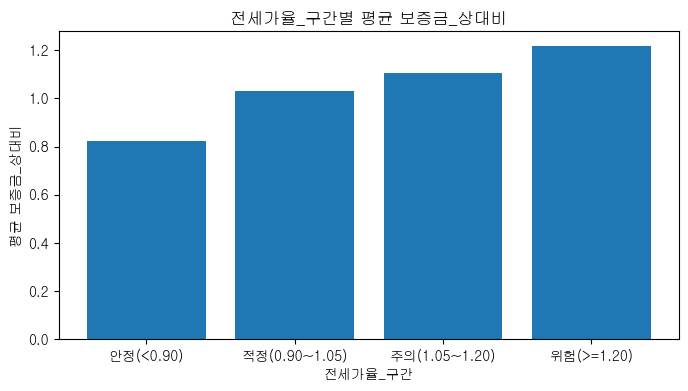

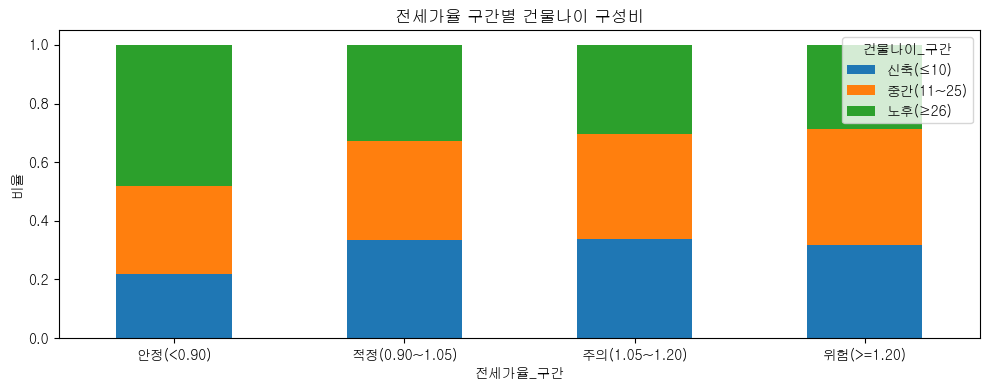

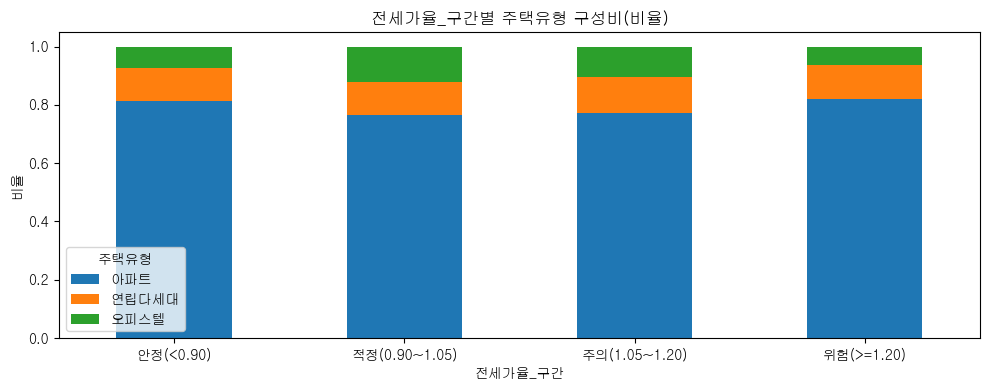

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager as fm
import warnings
import pandas as pd

warnings.filterwarnings('ignore')

# 폰트깨짐 방지
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)
plt.rcParams['axes.unicode_minus'] = False 


# =========================================================
# (2번 조건용) 보증금_상대비 = 보증금 / (같은 동+주택유형 평균 보증금)
# =========================================================
avg_deposit = (df.groupby(['동', '주택유형'])['보증금(만원)']
                 .mean()
                 .reset_index()
                 .rename(columns={'보증금(만원)': '평균_보증금(만원)'}))

df = df.merge(avg_deposit, on=['동', '주택유형'], how='left')
df['보증금_상대비'] = df['보증금(만원)'] / df['평균_보증금(만원)']


# =====================================================================
# (B 근거 강화) 전세가율_상대비 구간화 -> 다른 위험 신호/유형 구성비 변화 "증명"
# =====================================================================

# 1) 전세가율_상대비 구간화
max_ratio = df['전세가율_상대비'].dropna().max()
upper = max_ratio + 1e-9  # max가 경계값일 때 cut 누락 방지

df['전세가율_구간'] = pd.cut(
    df['전세가율_상대비'],
    bins=[0, 0.90, 1.05, 1.20, upper],
    labels=['안정(<0.90)', '적정(0.90~1.05)', '주의(1.05~1.20)', '위험(>=1.20)'],
    include_lowest=True
)

# 2-1) (시각화) 보증금_상대비
risk_trend = (df.groupby('전세가율_구간')[['보증금_상대비', '건물나이']]
                .mean()
                .round(4))

plt.figure(figsize=(8,4))
plt.bar(risk_trend.index.astype(str), risk_trend['보증금_상대비'])
plt.title('전세가율_구간별 평균 보증금_상대비')
plt.xlabel('전세가율_구간')
plt.ylabel('평균 보증금_상대비')
plt.xticks(rotation=0)
plt.show()

# 2-2) (시각화) 건물나이
df['건물나이_구간'] = pd.cut(
    df['건물나이'],
    bins=[0, 10, 25, df['건물나이'].max()],
    labels=['신축(≤10)', '중간(11~25)', '노후(≥26)'],
    include_lowest=True
)

age_ratio_by_jeonse = pd.crosstab(  # crosstab은 글자 중복현상 때문에 사용
    df['전세가율_구간'],
    df['건물나이_구간'],
    normalize='index'
).fillna(0)

age_ratio_by_jeonse.plot(kind='bar', stacked=True, figsize=(10,4))
plt.title('전세가율 구간별 건물나이 구성비')
plt.xlabel('전세가율_구간')
plt.ylabel('비율')
plt.xticks(rotation=0)
plt.tight_layout()  # 이것도 시각화 할 때 figsize 늘려놓고 여백 남는거 맞출 때 사용
plt.show()


# 3) (시각화) 주택유형

type_ratio_by_bin = pd.crosstab(
    df['전세가율_구간'],
    df['주택유형'],
    normalize='index'   
).fillna(0)

type_ratio_by_bin.plot(kind='bar', stacked=True, figsize=(10,4))
plt.title('전세가율_구간별 주택유형 구성비(비율)')
plt.xlabel('전세가율_구간')
plt.ylabel('비율')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### risk label 부여

In [ ]:
# =========================================================
# risk label 부여
# =========================================================

# 1) 전세가율_상대비 점수 (0.9 이상 +1, 1.05 이상 +2, 1.2 이상 +3)
df['risk_ratio'] = np.select(
    [
        df['전세가율_상대비'] >= 1.2,
        (df['전세가율_상대비'] >= 1.05) & (df['전세가율_상대비'] < 1.2),
        (df['전세가율_상대비'] >= 0.9) & (df['전세가율_상대비'] < 1.05)
    ],
    [3, 2, 1],
    default=0
)

# 2) 보증금_상대비 점수 (1.1 이상 +1, 1.2 이상 +2, 1.4 이상 +3)
df['risk_deposit'] = np.select(
    [
        df['보증금_상대비'] >= 1.4,
        (df['보증금_상대비'] >= 1.2) & (df['보증금_상대비'] < 1.4),
        (df['보증금_상대비'] >= 1.1) & (df['보증금_상대비'] < 1.2)
    ],
    [3, 2, 1],
    default=0
)

# 3) 주택유형 점수 (아파트 0, 연립다세대/오피스텔 +1)
df['risk_type'] = np.where(df['주택유형'].isin(['연립다세대', '오피스텔']), 1, 0)

# 4) 건물나이 점수 (<=10 +2, 11~25 +1, >=26 0)
df['risk_age'] = np.select(
    [
        df['건물나이'] <= 10,
        (df['건물나이'] > 10) & (df['건물나이'] < 26)
    ],
    [2, 1],
    default=0
)

# 총 risk label
df['risk_label'] = df['risk_ratio'] + df['risk_deposit'] + df['risk_type'] + df['risk_age']


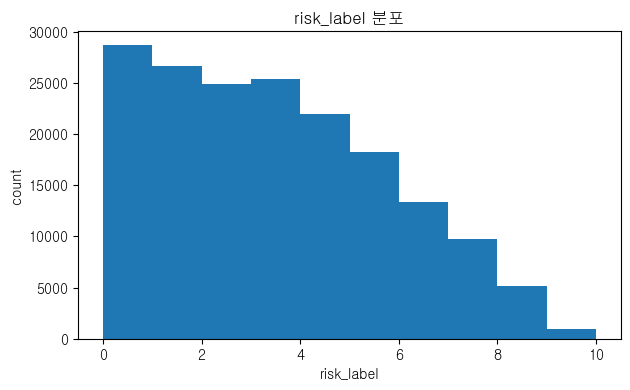

In [ ]:
# =========================================================
# risk label 결과 증명 - > 위험 점수는 대부분의 거래가 저-중위험 구간에 분포하고, 고위험 점수로 갈수록 거래 수가 감소하는 자연스러운 분포를 보임
#                         즉 위험 가중치 설계 잘 한 것을 증명 가능
# =========================================================

# risk_label 분포
plt.figure(figsize=(7,4))
plt.hist(df['risk_label'].dropna(), bins=range(int(df['risk_label'].min()), int(df['risk_label'].max())+2))
plt.title('risk_label 분포')
plt.xlabel('risk_label')
plt.ylabel('count')
plt.show()